# Unity Banana Navigation

---

The [`banana_nav`](https://github.com/daraliu/drl-banana-navigation) package is inspired by the examples from [Udacity Deep Reinforcent Learning Nano Degree repository](https://github.com/udacity/deep-reinforcement-learning).

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


from unityagents import UnityEnvironment
import pandas as pd

from banana_nav import navigation
from banana_nav import scores_util as su
from banana_nav import path_util as pu

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
/home/hm/anaconda3/envs/drlnd/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Set training output dir path and training hyper parameters

In [2]:
output_dir = "../training_output/baseline"
agent_type = 'dqn'

n_episodes = 2000
mean_score_threshold = 13.0
max_t = 1000
eps_start = 1.0
eps_end = 0.01
eps_decay = 0.995

agent_seed=0
logging_freq = 5

## Create Unity Banana Navigation Environment

In [3]:
env = UnityEnvironment(file_name="../Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Train a baseline agent

In [4]:
navigation.training(
    env,
    output_dir,
    agent_type,
    n_episodes,
    mean_score_threshold,
    max_t,
    eps_start,
    eps_end,
    eps_decay,
    agent_seed,
    logging_freq)

INFO:banana_nav.navigation:Ensuring output directory exists: ../training_output/baseline
Episode 5	Average Score: -1.00
Episode 10	Average Score: -0.60
Episode 15	Average Score: -0.27
Episode 20	Average Score: 0.00
Episode 25	Average Score: -0.08
Episode 30	Average Score: -0.03
Episode 35	Average Score: -0.03
Episode 40	Average Score: 0.05
Episode 45	Average Score: 0.11
Episode 50	Average Score: 0.24
Episode 55	Average Score: 0.16
Episode 60	Average Score: 0.20
Episode 65	Average Score: 0.26
Episode 70	Average Score: 0.29
Episode 75	Average Score: 0.31
Episode 80	Average Score: 0.29
Episode 85	Average Score: 0.36
Episode 90	Average Score: 0.33
Episode 95	Average Score: 0.39
Episode 100	Average Score: 0.37
Episode 105	Average Score: 0.51
Episode 110	Average Score: 0.58
Episode 115	Average Score: 0.58
Episode 120	Average Score: 0.60
Episode 125	Average Score: 0.60
Episode 130	Average Score: 0.65
Episode 135	Average Score: 0.71
Episode 140	Average Score: 0.67
Episode 145	Average Score: 0.

## Plot training score

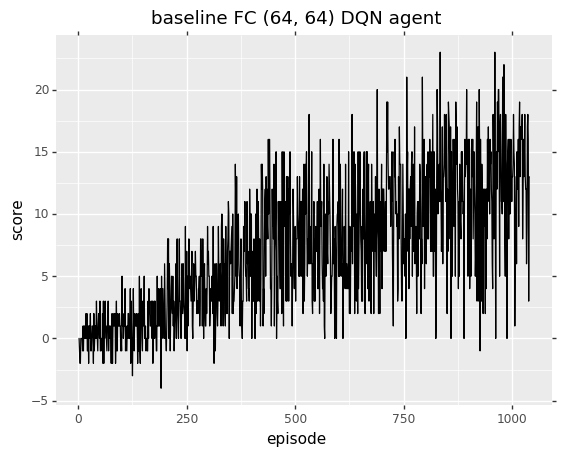

<ggplot: (8794097017818)>

In [23]:
df_scores = su.read_scores(output_dir)
p_scores = su.plot_scores(df_scores, "baseline FC (64, 64) DQN agent")
p_scores

In [24]:
p_scores.save("../img/baseline_fc_64_64_score.png")

## Run a demo of a Random Agent

In [28]:
navigation.demo(env)

1.0

## Run a demo of the trained agent

In [4]:
navigation.demo(env, pu.mk_path_weights(output_dir))

15.0

## Uncomment and run to close enviroment

In [5]:
# env.close()